> 作者：Emmanuelle Gouillart、Didrik Pinte、Gaël Varoquaux 和 Pauli Virtanen

本章给出关于Numpy概述，Numpy是Python中高效数值计算的核心工具。

## 1.3.1 Numpy 数组对象

### 1.3.1.1 什么是Numpy以及Numpy数组？

#### 1.3.1.1.1 Numpy数组

**Python对象：**

* 高级数值对象：整数、浮点
* 容器：列表（无成本插入和附加），字典（快速查找）

**Numpy提供：**

* 对于多维度数组的Python扩展包
* 更贴近硬件（高效）
* 为科学计算设计（方便）
* 也称为*面向数组计算*

In [1]:
import numpy as np
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

例如，数组包含：

* 实验或模拟在离散时间阶段的值
* 测量设备记录的信号，比如声波
* 图像的像素、灰度或颜色
* 用不同X-Y-Z位置测量的3-D数据，例如MRI扫描

...

**为什么有用：**提供了高速数值操作的节省内存的容器。

In [2]:
L = range(1000)
%timeit [i**2 for i in L]

10000 loops, best of 3: 93.7 µs per loop


In [4]:
a = np.arange(1000)
%timeit a**2

100000 loops, best of 3: 2.16 µs per loop


#### 1.3.1.1.2 Numpy参考文档

* 线上: http://docs.scipy.org/
* 交互帮助:

```python
np.array?
String Form:<built-in function array>
Docstring:
array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0, ...
```

查找东西：

In [6]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArray.__new__
    Create a new masked array from scratch.
numpy.lib.ar

```python
np.con*?
np.concatenate
np.conj
np.conjugate
np.convolve
```

#### 1.3.1.1.3 导入惯例

导入numpy的推荐惯例是：

In [8]:
import numpy as np

### 1.3.1.2 创建数组
#### 1.3.1.2.1 手动构建数组

* 1-D：

In [9]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [10]:
a.ndim

1

In [11]:
a.shape

(4,)

In [12]:
len(a)

4

* 2-D，3-D，...：

In [13]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 数组
b

array([[0, 1, 2],
       [3, 4, 5]])

In [14]:
b.ndim

2

In [15]:
b.shape

(2, 3)

In [16]:
len(b)     # 返回一个纬度的大小

2

In [17]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [18]:
c.shape

(2, 2, 1)

**练习：简单数组**

* 创建一个简单的二维数组。首先，重复上面的例子。然后接着你自己的：在第一行从后向前数奇数，接着第二行数偶数？
* 在这些数组上使用函数[len()](http://docs.python.org/2.7/library/functions.html#len)、numpy.shape()。他们有什么关系？与数组的`ndim`属性间呢？

#### 1.3.1.2.2 创建数组的函数

实际上，我们很少一项一项地输入...

* 均匀分布：

In [19]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
b = np.arange(1, 9, 2) # 开始，结束（不包含），步长
b

array([1, 3, 5, 7])

* 或者通过一些数据点：

In [1]:
c = np.linspace(0, 1, 6)   # 起点、终点、数据点
c

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [2]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

* 普通数组：

In [3]:
a = np.ones((3, 3))  # 提示: (3, 3) 是元组
a

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [4]:
b = np.zeros((2, 2))
b

array([[ 0.,  0.],
       [ 0.,  0.]])

In [5]:
c = np.eye(3)
c

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [6]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

* `np.random`: 随机数 (Mersenne Twister PRNG) :

In [7]:
a = np.random.rand(4)       # [0, 1] 的均匀分布
a

array([ 0.05504731,  0.38154156,  0.39639478,  0.22379146])

In [8]:
b = np.random.randn(4)      # 高斯
b

array([ 0.9895903 ,  1.85061188,  1.0021666 , -0.63782069])

In [9]:
np.random.seed(1234)        # 设置随机种子

In [10]:
np.random.rand?

**练习：用函数创建数组**
* 实验用`arange`、`linspace`、`ones`、`zeros`、`eye`和`diag`。
* 用随机数创建不同类型的数组。
* 在创建带有随机数的数组前设定种子。
* 看一下函数`np.empty`。它能做什么？什么时候会比较有用？

In [36]:
import numpy as np

a = np.arange(10,20,3)
print(a)

b = np.linspace(3,10,5)
print(b)

c = np.linspace(10,11,11,endpoint = False)
print(c)

d = np.ones((3,4))
print(d)

e = np.zeros((2,3))
print(e)

f = np.eye(5)
print(f)

g = np.random.rand(3,4)*10
print(g)

np.random.seed(100)
h = np.random.rand(4,4)*10
print(h)

###当返回一个全0矩阵不安全时采用np.empty生成随机填充极小数据的矩阵

[10 13 16 19]
[  3.     4.75   6.5    8.25  10.  ]
[ 10.          10.09090909  10.18181818  10.27272727  10.36363636
  10.45454545  10.54545455  10.63636364  10.72727273  10.81818182
  10.90909091]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
[[ 8.11683149  1.71941013  8.16224749  2.74073747]
 [ 4.31704184  9.4002982   8.17649379  3.3611195 ]
 [ 1.75410454  3.72832046  0.05688507  2.52426353]]
[[ 5.43404942  2.78369385  4.24517591  8.44776132]
 [ 0.04718856  1.21569121  6.70749085  8.25852755]
 [ 1.3670659   5.75093329  8.91321954  2.09202122]
 [ 1.8532822   1.0837689   2.19697493  9.78623785]]


### 1.3.1.3基础数据类型

你可能已经发现，在一些情况下，数组元素显示带有点（即 2. VS 2）。这是因为所使用的数据类型不同：

In [12]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [13]:
b = np.array([1., 2., 3.])
b

array([ 1.,  2.,  3.])

不同的数据类型可以更紧凑的在内存中存储数据，但是大多数时候我们都只是操作浮点数据。注意，在上面的例子中，Numpy自动从输入中识别了数据类型。

你可以明确的指定想要的类型：

In [1]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

**默认**数据类型是浮点:

In [2]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

其他类型：

**复数**：

In [4]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

**布尔**：

In [5]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

**字符**：

In [6]:
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f.dtype     # <--- 包含最多7个字母的字符

dtype('S7')

**更多**：

* int32
* int64
* unit32
* unit64

### 1.3.1.4基本可视化

现在我们有了第一个数组，我们将要进行可视化。

从*pylab*模式启动IPython。

```
ipython --pylab
```

或notebook：

```
ipython notebook --pylab=inline
```

或者如果IPython已经启动，那么：

In [24]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


或者从Notebook中：

In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`inline` 对notebook来说很重要，以便绘制的图片在notebook中显示而不是在新窗口显示。

*Matplotlib*是2D制图包。我们可以像下面这样导入它的方法：

In [26]:
import matplotlib.pyplot as plt  #整洁形式

然后使用（注你需要显式的使用 `show` ）:

```python
plt.plot(x, y)       # 线图
plt.show()           # <-- 显示图表（使用pylab的话不需要）
```

或者，如果你使用 `pylab`：

```python
plt.plot(x, y)       # 线图
```

在脚本中推荐使用 `import matplotlib.pyplot as plt`。 而交互的探索性工作中用 `pylab`。

* 1D作图：

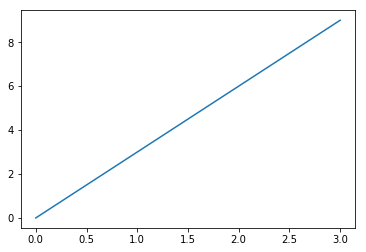

In [27]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # 线图

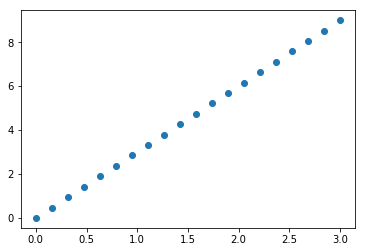

In [28]:
plt.plot(x, y, 'o')  # 点图

* 2D 作图:

<matplotlib.colorbar.Colorbar instance at 0x106a095f0>

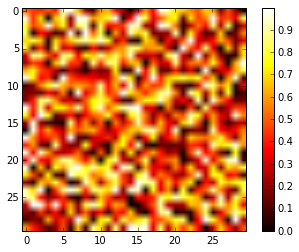

In [14]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

更多请见[matplotlib部分](http://localhost:8889/notebooks/1.4Matplotlib%EF%BC%9A%E7%BB%98%E5%9B%BE.ipynb)

**练习**：简单可视化

画出简单的数组：cosine作为时间的一个函数以及2D矩阵。

在2D矩阵上试试使用 `gray` colormap。

[-10.       -9.99999  -9.99998 ...,   9.99997   9.99998   9.99999]
[-0.83907153 -0.83907697 -0.83908241 ..., -0.83908785 -0.83908241
 -0.83907697]


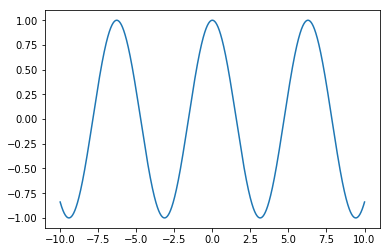

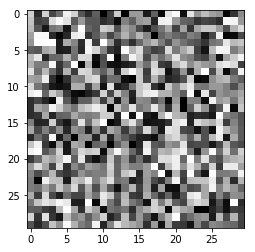

In [46]:
t = np.arange(-10,10,0.00001)
print(t)
cosine = np.cos(t)
print(cosine)
plt.plot(t,cosine)
plt.show()

test = np.random.rand(30,30)
plt.imshow(test,plt.cm.gray)

#### 1.3.1.5索引和切片

数组的项目可以用与其他Python序列（比如：列表）一样的方式访问和赋值：

In [15]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
a[0], a[2], a[-1]

(0, 2, 9)

**警告**：索引从0开始与其他的Python序列（以及C/C++）一样。相反，在Fortran或者Matlab索引从1开始。

使用常用的Python风格来反转一个序列也是支持的：

In [17]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

对于多维数组，索引是整数的元组：

In [18]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [19]:
a[1, 1]

1

In [21]:
a[2, 1] = 10 # 第三行，第二列
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [22]:
a[1]

array([0, 1, 0])

**注**：

* 在2D数组中，第一个维度对应行，第二个维度对应列。
* 对于多维度数组 `a`，a[0]被解释为提取在指定维度的所有元素

**切片**：数组与其他Python序列也可以被切片：

In [23]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
a[2:9:3] # [开始:结束:步长]

array([2, 5, 8])

注意最后一个索引是不包含的！：

In [25]:
a[:4]

array([0, 1, 2, 3])

切片的三个元素都不是必选：默认情况下，起点是0，结束是最后一个，步长是1：

In [26]:
a[1:3]

array([1, 2])

In [27]:
a[::2]

array([0, 2, 4, 6, 8])

In [28]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

Numpy索引和切片的一个小说明...

![numpy_indexing](http://scipy-lectures.github.io/_images/numpy_indexing.png)

赋值和切片可以结合在一起：

In [57]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [30]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

**练习：索引与切片**
* 试试切片的特色，用起点、结束和步长：从linspace开始，试着从后往前获得奇数，从前往后获得偶数。
重现上面示例中的切片。你需要使用下列表达式创建这个数组：

In [54]:
a = np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]
print(a)


b = a[::-1,::-2]
print(b)
c = a[0:,0::2]
print(c)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]
[[55 53 51]
 [45 43 41]
 [35 33 31]
 [25 23 21]
 [15 13 11]
 [ 5  3  1]]
[[ 0  2  4]
 [10 12 14]
 [20 22 24]
 [30 32 34]
 [40 42 44]
 [50 52 54]]


**练习：数组创建**

创建下列的数组（用正确的数据类型）：

```python
[[1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 6, 1, 1]]

[[0., 0., 0., 0., 0.],
 [2., 0., 0., 0., 0.],
 [0., 3., 0., 0., 0.],
 [0., 0., 4., 0., 0.],
 [0., 0., 0., 5., 0.],
 [0., 0., 0., 0., 6.]]
```

参考标准：每个数组

提示：每个数组元素可以像列表一样访问，即a[1] 或 a[1, 2]。

提示：看一下 `diag` 的文档字符串。

**练习：创建平铺数组**

看一下 `np.tile` 的文档，是用这个函数创建这个数组：

```python
[[4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1],
 [4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1]]
```



In [100]:
a = np.ones((4,4),dtype = int)
a[2][3]+=1
a[3][1]+=5
a

b = np.zeros((6,5))
b
c = np.diag(np.arange(2.0,7.0))
b[1:] = c
b

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  0.,  0.],
       [ 0.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  6.]])

In [ ]:
### 1.3.1.6 副本和视图

切片操作创建原数组的一个**视图**，这只是访问数组数据一种方式。因此，原始的数组并不是在内存中复制。你可以用 `np.may_share_memory()` 来确认两个数组是否共享相同的内存块。但是请注意，这种方式使用启发式，可能产生漏报。

**当修改视图时，原始数据也被修改**：

In [32]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [34]:
np.may_share_memory(a, b)

True

In [36]:
b[0] = 12
b

array([12,  2,  4,  6,  8])

In [37]:
a   # (!)

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [38]:
a = np.arange(10)
c = a[::2].copy()  # 强制复制
c[0] = 12
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
np.may_share_memory(a, c)

False

乍看之下这种行为可能有些奇怪，但是这样做节省了内存和时间。

**实例：素数筛选**

![prime](http://scipy-lectures.github.io/_images/prime-sieve.png)

用筛选法计算0-99之间的素数

* 构建一个名为 `_prime` 形状是 (100,) 的布尔数组，在初始将值都设为True：

In [40]:
is_prime = np.ones((100,), dtype=bool)

* 将不属于素数的0，1去掉

In [41]:
is_prime[:2] = 0

对于从2开始的整数 `j` ，化掉它的倍数：

In [42]:
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2*j::j] = False

* 看一眼 `help(np.nonzero)`，然后打印素数
* 接下来:
    * 将上面的代码放入名为 `prime_sieve.py` 的脚本文件
    * 运行检查一下时候有效
    * 使用[埃拉托斯特尼筛法](http://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)的优化建议
        1. 跳过已知不是素数的 `j`
        2. 第一个应该被划掉的数是$j^2$

#### 1.3.1.7象征索引

Numpy数组可以用切片索引，也可以用布尔或整形数组（面具）。这个方法也被称为象征索引。它创建一个副本而不是视图。

#### 1.3.1.7.1使用布尔面具

In [44]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [45]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False], dtype=bool)

In [47]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # 或,  a[a%3==0]
extract_from_a           # 用面具抽取一个子数组

array([ 3,  0,  9,  6,  0, 12])

赋值给子数组时，用面具索引非常有用：

In [48]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

#### 1.3.1.7.2 用整型数组索引

In [49]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

索引可以用整型数组完成，其中相同的索引重复了几次：

In [50]:
a[[2, 3, 2, 4, 2]]  # 注：[2, 3, 2, 4, 2] 是Python列表

array([20, 30, 20, 40, 20])

用这种类型的索引可以分配新值：

In [51]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

当一个新数组用整型数组索引创建时，新数组有相同的形状，而不是整数数组：

In [52]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [53]:
a[idx]

array([[3, 4],
       [9, 7]])

下图展示了多种象征索引的应用
![numpy_fancy_indexing](http://scipy-lectures.github.io/_images/numpy_fancy_indexing.png)

**练习：象征索引**
* 同样，重新生成上图中所示的象征索引
* 用左侧的象征索引和右侧的数组创建在为一个数组赋值，例如，设置上图数组的一部分为0。

## 1.3.2 数组的数值操作
### 1.3.2.1 元素级操作
#### 1.3.2.1.1 基础操作

标量:

In [54]:
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [55]:
2**a

array([ 2,  4,  8, 16])

所有运算是在元素级别上操作：

In [56]:
b = np.ones(4) + 1
a - b

array([-1.,  0.,  1.,  2.])

In [57]:
a * b

array([ 2.,  4.,  6.,  8.])

In [58]:
j = np.arange(5)
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

这些操作当然也比你用纯Python实现好快得多：

In [60]:
a = np.arange(10000)
%timeit a + 1 

100000 loops, best of 3: 11 µs per loop


In [61]:
l = range(10000)
%timeit [i+1 for i in l] 

1000 loops, best of 3: 560 µs per loop


**注意：数组相乘不是矩阵相乘：**

In [62]:
c = np.ones((3, 3))
c * c                   # 不是矩阵相乘！

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

**注：矩阵相乘：**

In [63]:
c.dot(c)

array([[ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.]])

**练习：元素级别的操作**

* 试一下元素级别的简单算术操作
* 用 `%timeit` 比一下他们与纯Python对等物的时间
* 生成：
    * `[2**0, 2**1, 2**2, 2**3, 2**4]`
    * `a_j = 2^(3*j) - j`

#### 1.3.2.1.2其他操作

**对比：**

In [64]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True], dtype=bool)

In [65]:
a > b

array([False, False,  True, False], dtype=bool)

数组级别的对比：

In [66]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)

False

In [67]:
np.array_equal(a, c)

True

**逻辑操作**：

In [68]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False], dtype=bool)

In [69]:
np.logical_and(a, b)

array([ True, False, False, False], dtype=bool)

**[超越函数](http://baike.baidu.com/link?url=3aAGiGcMZFhxRP7D1CWzajcHf-OVCM6L6J1Eaxv1rPxFyEYKRoHXHdcYqKfUIc0q-hcxB_UoE73B5O0GyH1mf_)**

In [71]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [72]:
np.log(a)

-c:1: RuntimeWarning: divide by zero encountered in log


array([       -inf,  0.        ,  0.69314718,  1.09861229,  1.38629436])

In [73]:
np.exp(a)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

**形状不匹配**

In [74]:
a = np.arange(4)
a + np.array([1, 2])  

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

*广播*？我们将在[稍后](#Broadcasting)讨论。

**变换**

In [76]:
a = np.triu(np.ones((3, 3)), 1)   # 看一下 help(np.triu)
a

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [77]:
a.T

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

**警告：变换是视图**

因此，下列的代码是错误的，将导致矩阵不对称：

In [78]:
a += a.T

**注：线性代数**

子模块 `numpy.linalg` 实现了基础的线性代数，比如解开线性系统，奇异值分解等。但是，并不能保证以高效的方式编译，因此，建议使用 `scipy.linalg`, 详细的内容见[线性代数操作](1.5. Scipy：高级科学计算.ipynb)：`scipy.linalg`。

**练习：其他操作**
* 看一下 `np.allclose` 的帮助，什么时候这很有用？
* 看一下 `np.triu`和 `np.tril`的帮助。

### 1.3.2.2 基础简化
#### 1.3.2.2.1 计算求和

In [79]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [80]:
x.sum()

10

行求和和列求和：

![reductions](http://scipy-lectures.github.io/_images/reductions.png)

In [81]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [83]:
x.sum(axis=0)   # 列 (第一纬度)

array([3, 3])

In [84]:
x[:, 0].sum(), x[:, 1].sum()

(3, 3)

In [85]:
x.sum(axis=1)   # 行 (第二纬度)

array([2, 4])

In [86]:
x[0, :].sum(), x[1, :].sum()

(2, 4)

高维的处理，思路相同：

In [87]:
x = np.random.rand(2, 2, 2)
x.sum(axis=2)[0, 1]

1.2671177193964822

In [88]:
x[0, 1, :].sum()     

1.2671177193964822

#### 1.3.2.2.2 其他简化

- 以相同方式运作（也可以使用 `axis=` ）

**极值**

In [89]:
x = np.array([1, 3, 2])
x.min()

1

In [90]:
x.max()

3

In [91]:
x.argmin()  # 最小值的索引

0

In [92]:
x.argmax()  # 最大值的索引

1

**逻辑运算**：

In [93]:
np.all([True, True, False])

False

In [94]:
np.any([True, True, False])

True

**注**：可以被应用数组对比：

In [95]:
a = np.zeros((100, 100))
np.any(a != 0)

False

In [96]:
np.all(a == a)

True

In [97]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c)).all()

True

**统计:**

In [98]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

1.75

In [99]:
np.median(x)

1.5

In [100]:
np.median(y, axis=-1) # 最后的坐标轴

array([ 2.,  5.])

In [101]:
x.std()          # 全体总体的标准差。

0.82915619758884995

... 以及其他更多（随着你成长最好学习一下）。

**练习：简化**

* 假定有 `sum` ，你会期望看到哪些其他的函数？
* `sum` 和 `cumsum` 有什么区别？

**实例: 数据统计**

[populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt)中的数据描述了过去20年加拿大北部野兔和猞猁的数量（以及胡萝卜）。

你可以在编辑器或在IPython看一下数据（shell或者notebook都可以）：

In [104]:
cat data/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


首先，将数据加载到Numpy数组：

In [107]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T  # 技巧: 将列分配给变量

接下来作图：

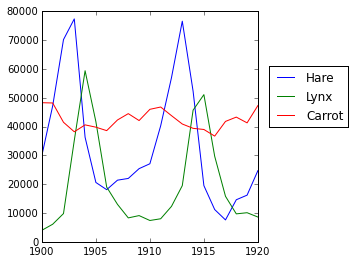

In [108]:
from matplotlib import pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

随时间变化的数量的平均数：

In [109]:
populations = data[:, 1:]
populations.mean(axis=0)

array([ 34080.95238095,  20166.66666667,  42400.        ])

样本的标准差：

In [110]:
populations.std(axis=0)

array([ 20897.90645809,  16254.59153691,   3322.50622558])

每一年哪个物种有最高的数量？：

In [111]:
np.argmax(populations, axis=1)

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2])

**实例：随机游走算法扩散**

[random_walk](http://scipy-lectures.github.io/_images/random_walk.png)

让我们考虑一下简单的1维随机游走过程：在每个时间点，行走者以相等的可能性跳到左边或右边。我们感兴趣的是找到随机游走者在 `t` 次左跳或右跳后距离原点的典型距离？我们将模拟许多”行走者“来找到这个规律，并且我们将采用数组计算技巧来计算：我们将创建一个2D数组记录事实，一个方向是经历（每个行走者有一个经历），一个纬度是时间：

![random_walk_schema](http://scipy-lectures.github.io/_images/random_walk_schema.png)

In [113]:
n_stories = 1000 # 行走者的数
t_max = 200      # 我们跟踪行走者的时间

我们随机选择步长1或-1去行走：

In [115]:
t = np.arange(t_max)
steps = 2 * np.random.random_integers(0, 1, (n_stories, t_max)) - 1
np.unique(steps) # 验证: 所有步长是1或-1

array([-1,  1])

我们通过汇总随着时间的步骤来构建游走

In [116]:
positions = np.cumsum(steps, axis=1) # axis = 1: 纬度是时间
sq_distance = positions**2

获得经历轴的平均数：

In [117]:
mean_sq_distance = np.mean(sq_distance, axis=0)

画出结果：

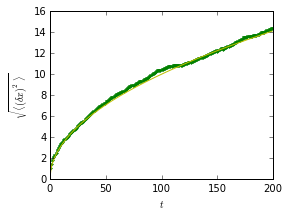

In [126]:
plt.figure(figsize=(4, 3)) 
plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-')
plt.xlabel(r"$t$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 

我们找到了物理学上一个著名的结果：均方差记录是时间的平方根！

<a id='Broadcasting'></a>
### 1.3.2.3 广播

* numpy数组的基本操作（相加等）是元素级别的
* 在相同大小的数组上仍然适用。
    **尽管如此**, 也可能在不同大小的数组上进行这个操作，假如Numpy可以将这些数组转化为相同的大小：这种转化称为广播。
    
下图给出了一个广播的例子：

![numpy_broadcasting](http://scipy-lectures.github.io/_images/numpy_broadcasting.png)

让我们验证一下：

In [127]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [128]:
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

在不知道广播的时候已经使用过它！：

In [129]:
a = np.ones((4, 5))
a[0] = 2  # 我们将一个数组的纬度0分配给另一个数组的纬度1
a

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [130]:
a = np.ones((4, 5))
print a[0]
a[0] = 2  # 我们将一个数组的纬度0分配给另一个数组的纬度
a

[ 1.  1.  1.  1.  1.]


array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

一个有用的技巧：

In [133]:
a = np.arange(0, 40, 10)
a.shape

(4,)

In [134]:
a = a[:, np.newaxis]  # 添加一个新的轴 -> 2D 数组
a.shape

(4, 1)

In [135]:
a

array([[ 0],
       [10],
       [20],
       [30]])

In [136]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

广播看起来很神奇，但是，当我们要解决的问题是输出数据比输入数据有更多纬度的数组时，使用它是非常自然的。

**实例：广播**

让我们创建一个66号公路上城市之间距离（用公里计算）的数组：芝加哥、斯普林菲尔德、圣路易斯、塔尔萨、俄克拉何马市、阿马里洛、圣塔菲、阿尔布开克、Flagstaff、洛杉矶。

In [138]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

![route66](http://scipy-lectures.github.io/_images/route66.png)

许多基于网格或者基于网络的问题都需要使用广播。例如，如果要计算10X10网格中每个点到原点的数据，可以这样：

In [139]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

或者用颜色：

<matplotlib.colorbar.Colorbar instance at 0x10d8d7170>

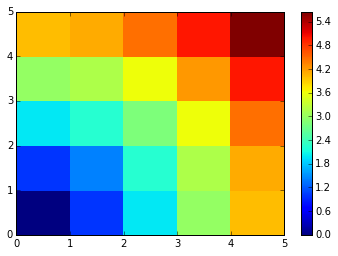

In [141]:
plt.pcolor(distance)    
plt.colorbar()   

**评论** : `numpy.ogrid` 函数允许直接创建上一个例子中两个**重要纬度**向量X和Y：

In [142]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [143]:
x.shape, y.shape

((5, 1), (1, 5))

In [144]:
distance = np.sqrt(x ** 2 + y ** 2)

因此， `np.ogrid` 就非常有用，只要我们是要处理网格计算。另一方面， 在一些无法（或者不想）从广播中收益的情况下，`np.mgrid` 直接提供了由索引构成的矩阵：

In [145]:
x, y = np.mgrid[0:4, 0:4]
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [146]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

### 1.3.2.4数组形状操作

#### 1.3.2.4.1 扁平

In [147]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [148]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [149]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

高维：后进先出。

#### 1.3.2.4.2 重排

扁平的相反操作：

In [150]:
a.shape

(2, 3)

In [152]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

或者：

In [153]:
a.reshape((2, -1))    # 不确定的值（-1）将被推导

array([[1, 2, 3],
       [4, 5, 6]])

**警告**： `ndarray.reshape` 可以返回一个视图（参见 `help(np.reshape)`）, 也可以可以返回副本

In [155]:
b[0, 0] = 99
a

array([[99,  2,  3],
       [ 4,  5,  6]])

当心：重排也可以返回一个副本！：

In [156]:
a = np.zeros((3, 2))
b = a.T.reshape(3*2)
b[0] = 9
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

要理解这个现象，你需要了解更多关于numpy数组内存设计的知识。

#### 1.3.2.4.3 添加纬度

用 `np.newaxis`对象进行索引可以为一个数组添加轴（在上面关于广播的部分你已经看到过了）：

In [157]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [158]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [159]:
z[np.newaxis, :]

array([[1, 2, 3]])

#### 1.3.2.4.4 纬度重组

In [160]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a.shape

(4, 3, 2)

In [161]:
a[0, 2, 1]

5

In [163]:
b = a.transpose(1, 2, 0)
b.shape

(3, 2, 4)

In [164]:
b[2, 1, 0]

5

也是创建了一个视图：

In [165]:
b[2, 1, 0] = -1
a[0, 2, 1]

-1

#### 1.3.2.4.5 改变大小

可以用 `ndarray.resize` 改变数组的大小：

In [167]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

但是，它不能在其他地方引用：

In [168]:
b = a
a.resize((4,))  

ValueError: cannot resize an array that references or is referenced
by another array in this way.  Use the resize function

**练习：形状操作**
* 看一下 `reshape` 的文档字符串，特别要注意其中关于副本和视图的内容。
* 用 `flatten` 来替换 `ravel`。有什么区别？ (提示: 试一下哪个返回视图哪个返回副本)
* 试一下用 `transpose` 来进行纬度变换。

### 1.3.2.5 数据排序

按一个轴排序：

In [169]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

**注**：每行分别排序！

原地排序：

In [170]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

象征索引排序：

In [171]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0])

In [172]:
a[j]

array([1, 2, 3, 4])

找到最大值和最小值：

In [173]:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)

**练习：排序**
* 试一下原地和非原地排序
* 试一下用不同的数据类型创建数组并且排序。
* 用 `all` 或者  `array_equal` 来检查一下结果。
* 看一下 `np.random.shuffle`，一种更快创建可排序输入的方式。
* 合并 `ravel` 、`sort` 和 `reshape`。
* 看一下 `sort` 的 `axis` 关键字，重写一下这个练习。

### 1.3.2.6 总结

**入门你需要了解什么？**
* 了解如何创建数组：`array`、`arange`、`ones`、`zeros`。
* 了解用 `array.shape`数组的形状，然后使用切片来获得数组的不同视图：`array[::2]`等。用 `reshape`改变数组形状或者用 `ravel`扁平化。
* 获得数组元素的一个子集，和/或用面具修改他们的值ay and/or modify their values with masks

In [174]:
a[a < 0] = 0

* 了解数组上各式各样的操作，比如找到平均数或最大值 (`array.max()`、`array.mean()`)。不需要记住所有东西，但是应该有条件反射去搜索文档 (线上文档, `help()`, `lookfor()`)!!
* 更高级的用法：掌握用整型数组索引，以及广播。了解更多的Numpy函数以便处理多种数组操作。

**快读阅读**

如果你想要快速通过科学讲座笔记来学习生态系统，你可以直接跳到下一章：Matplotlib: 作图(暂缺)。

本章剩下的内容对于学习介绍部分不是必须的。但是，记得回来完成本章并且完成更多的练习。

## 1.3.3 数据的更多内容

### 1.3.3.1 更多的数据类型

#### 1.3.3.1.1 投射

“更大”的类型在混合类型操作中胜出：

In [175]:
np.array([1, 2, 3]) + 1.5

array([ 2.5,  3.5,  4.5])

赋值不会改变类型！

In [176]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [178]:
a[0] = 1.9     # <-- 浮点被截取为整数
a

array([1, 2, 3])

强制投射：

In [179]:
a = np.array([1.7, 1.2, 1.6])
b = a.astype(int)  # <-- 截取整数
b

array([1, 1, 1])

四舍五入：

In [180]:
a = np.array([1.2, 1.5, 1.6, 2.5, 3.5, 4.5])
b = np.around(a)
b                    # 仍然是浮点

array([ 1.,  2.,  2.,  2.,  4.,  4.])

In [181]:
c = np.around(a).astype(int)
c

array([1, 2, 2, 2, 4, 4])

#### 1.3.3.1.2 不同数据类型的大小

整数 (带有符号):

|类型	|字节数|
|-------|------|
|int8	|8 bits|
|int16	|16 bits|
|int32	|32 bits (与32位平台的int相同)|
|int64	|64 bits (与64位平台的int相同)|

In [182]:
np.array([1], dtype=int).dtype

dtype('int64')

In [183]:
np.iinfo(np.int32).max, 2**31 - 1

(2147483647, 2147483647)

In [184]:
np.iinfo(np.int64).max, 2**63 - 1

(9223372036854775807, 9223372036854775807L)

无符号整数:

类型|字节数
-|-
uint8|8 bits
uint16|16 bits
uint32|32 bits
uint64|64 bits

In [185]:
np.iinfo(np.uint32).max, 2**32 - 1

(4294967295, 4294967295)

In [186]:
np.iinfo(np.uint64).max, 2**64 - 1

(18446744073709551615L, 18446744073709551615L)

浮点数据：

类型|字节数
-|-
float16|16 bits
float32|32 bits
float64|64 bits (与浮点相同)
float96|96 bits, 平台依赖 (与 `np.longdouble` 相同)
float128|128 bits, 平台依赖 (与 `np.longdouble`相同)

In [187]:
np.finfo(np.float32).eps

1.1920929e-07

In [188]:
np.finfo(np.float64).eps

2.2204460492503131e-16

In [189]:
np.float32(1e-8) + np.float32(1) == 1

True

In [190]:
np.float64(1e-8) + np.float64(1) == 1

False

浮点复数：

类型|字节数
-|-
complex64|两个 32-bit 浮点
complex128|两个 64-bit 浮点
complex192|两个 96-bit 浮点, 平台依赖
complex256|两个 128-bit 浮点, 平台依赖

**更小的数据类型**

如果你不知道需要特殊数据类型，那你可能就不需要。

比较使用 `float32`代替 `float64`:
* 一半的内存和硬盘大小
* 需要一半的宽带（可能在一些操作中更快）

In [191]:
a = np.zeros((1e6,), dtype=np.float64)
b = np.zeros((1e6,), dtype=np.float32)
%timeit a*a

1000 loops, best of 3: 1.41 ms per loop


In [192]:
%timeit b*b

1000 loops, best of 3: 739 µs per loop


* 但是更大的四舍五入误差 - 有时在一些令人惊喜的地方（即，不要使用它们除非你真的需要）

### 1.3.3.2 结构化的数据类型

名称|类型
-|-
sensor_code|(4个字母的字符)
position|(浮点)
value|(浮点)

In [194]:
samples = np.zeros((6,), dtype=[('sensor_code', 'S4'),('position', float), ('value', float)])
samples.ndim

1

In [195]:
samples.shape

(6,)

In [196]:
samples.dtype.names

('sensor_code', 'position', 'value')

In [198]:
samples[:] = [('ALFA',   1, 0.37), ('BETA', 1, 0.11), ('TAU', 1,   0.13),('ALFA', 1.5, 0.37), ('ALFA', 3, 0.11),
              ('TAU', 1.2, 0.13)]
samples

array([('ALFA', 1.0, 0.37), ('BETA', 1.0, 0.11), ('TAU', 1.0, 0.13),
       ('ALFA', 1.5, 0.37), ('ALFA', 3.0, 0.11), ('TAU', 1.2, 0.13)], 
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

用字段名称索引也可以访问字段：

In [199]:
samples['sensor_code']

array(['ALFA', 'BETA', 'TAU', 'ALFA', 'ALFA', 'TAU'], 
      dtype='|S4')

In [200]:
samples['value']

array([ 0.37,  0.11,  0.13,  0.37,  0.11,  0.13])

In [201]:
samples[0]

('ALFA', 1.0, 0.37)

In [202]:
samples[0]['sensor_code'] = 'TAU'
samples[0]

('TAU', 1.0, 0.37)

一次多个字段：

In [203]:
samples[['position', 'value']]

array([(1.0, 0.37), (1.0, 0.11), (1.0, 0.13), (1.5, 0.37), (3.0, 0.11),
       (1.2, 0.13)], 
      dtype=[('position', '<f8'), ('value', '<f8')])

和普通情况一样，象征索引也有效：

In [204]:
samples[samples['sensor_code'] == 'ALFA']

array([('ALFA', 1.5, 0.37), ('ALFA', 3.0, 0.11)], 
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

**注**：构建结构化数组有需要其他的语言，见[这里](http://docs.scipy.org/doc/numpy/user/basics.rec.html)和[这里](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html#specifying-and-constructing-data-types)。

### 1.3.3.3 面具数组（maskedarray）: 处理缺失值（的传播）

* 对于浮点不能用NaN，但是面具对所有类型都适用：

In [207]:
x = np.ma.array([1, 2, 3, 4], mask=[0, 1, 0, 1])
x

masked_array(data = [1 -- 3 --],
             mask = [False  True False  True],
       fill_value = 999999)

In [208]:
y = np.ma.array([1, 2, 3, 4], mask=[0, 1, 1, 1])
x + y

masked_array(data = [2 -- -- --],
             mask = [False  True  True  True],
       fill_value = 999999)

* 通用函数的面具版本：

In [209]:
np.ma.sqrt([1, -1, 2, -2])

masked_array(data = [1.0 -- 1.4142135623730951 --],
             mask = [False  True False  True],
       fill_value = 1e+20)

**注**：有许多其他数组的[兄弟姐妹](2.2. 高级Numpy.ipynb)

-----
尽管这脱离了Numpy这章的主题，让我们花点时间回忆一下编写代码的最佳实践，从长远角度这绝对是值得的：

**最佳实践**
* 明确的变量名（不需要备注去解释变量里是什么）
* 风格：逗号后及＝周围有空格等。

    在[Python代码风格指南](http://www.python.org/dev/peps/pep-0008)及[文档字符串惯例](http://www.python.org/dev/peps/pep-0257)页面中给出了相当数据量如何书写“漂亮代码”的规则（并且，最重要的是，与其他人使用相同的惯例!）。
* 除非在一些极特殊的情况下，变量名及备注用英文。

## 1.3.4 高级操作

1.3.4.1. 多项式

Numpy也包含不同基的多项式：

例如，$3x^2 + 2x - 1$:

In [211]:
p = np.poly1d([3, 2, -1])
p(0)

-1

In [212]:
p.roots

array([-1.        ,  0.33333333])

In [213]:
p.order

2

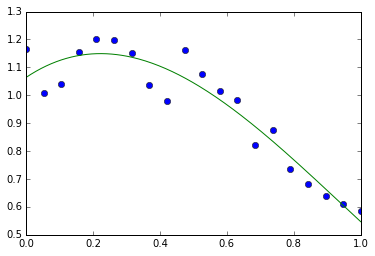

In [215]:
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 3))
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-') 

更多内容见http://docs.scipy.org/doc/numpy/reference/routines.polynomials.poly1d.html。

#### 1.3.4.1.1 更多多项式（有更多的基）

Numpy也有更复杂的多项式接口，支持比如切比雪夫基。

\\(3x^2 + 2x - 1\\):

In [216]:
p = np.polynomial.Polynomial([-1, 2, 3]) # 系数的顺序不同！
p(0)

-1.0

In [217]:
p.roots()

array([-1.        ,  0.33333333])

In [218]:
p.degree()  # 在普通的多项式中通常不暴露'order'

2

在切尔雪夫基中使用多项式的例子，多项式的范围在[-1,1]：

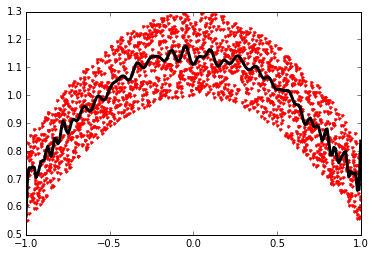

In [221]:
x = np.linspace(-1, 1, 2000)
y = np.cos(x) + 0.3*np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)
t = np.linspace(-1, 1, 200)
plt.plot(x, y, 'r.')  
plt.plot(t, p(t), 'k-', lw=3) 

切尔雪夫多项式在插入方面有很多优势。

### 1.3.4.2 加载数据文件

#### 1.3.4.2.1 文本文件

例子: [populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt):

```
# year  hare    lynx    carrot
1900    30e3    4e3     48300
1901    47.2e3  6.1e3   48200
1902    70.2e3  9.8e3   41500
1903    77.4e3  35.2e3  38200
```

In [222]:
data = np.loadtxt('data/populations.txt')
data

array([[  1900.,  30000.,   4000.,  48300.],
       [  1901.,  47200.,   6100.,  48200.],
       [  1902.,  70200.,   9800.,  41500.],
       [  1903.,  77400.,  35200.,  38200.],
       [  1904.,  36300.,  59400.,  40600.],
       [  1905.,  20600.,  41700.,  39800.],
       [  1906.,  18100.,  19000.,  38600.],
       [  1907.,  21400.,  13000.,  42300.],
       [  1908.,  22000.,   8300.,  44500.],
       [  1909.,  25400.,   9100.,  42100.],
       [  1910.,  27100.,   7400.,  46000.],
       [  1911.,  40300.,   8000.,  46800.],
       [  1912.,  57000.,  12300.,  43800.],
       [  1913.,  76600.,  19500.,  40900.],
       [  1914.,  52300.,  45700.,  39400.],
       [  1915.,  19500.,  51100.,  39000.],
       [  1916.,  11200.,  29700.,  36700.],
       [  1917.,   7600.,  15800.,  41800.],
       [  1918.,  14600.,   9700.,  43300.],
       [  1919.,  16200.,  10100.,  41300.],
       [  1920.,  24700.,   8600.,  47300.]])

In [224]:
np.savetxt('pop2.txt', data)
data2 = np.loadtxt('pop2.txt')

**注**：如果你有一个复杂的文本文件，应该尝试：
* `np.genfromtxt`
* 使用Python的I/O函数和例如正则式来解析（Python特别适合这个工作）

**提示：用IPython在文件系统中航行**

In [225]:
pwd      # 显示当前目录

u'/Users/cloga/Documents/scipy-lecture-notes_cn'

In [227]:
cd data

/Users/cloga/Documents/scipy-lecture-notes_cn/data


In [228]:
ls

populations.txt


#### 1.3.4.2.2 图像

使用Matplotlib：

In [233]:
img = plt.imread('data/elephant.png')
img.shape, img.dtype

((200, 300, 3), dtype('float32'))

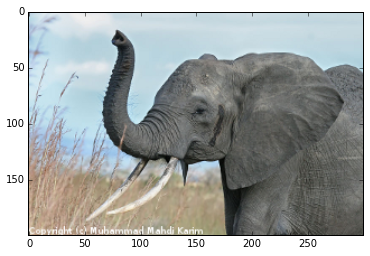

In [234]:
plt.imshow(img)

In [237]:
plt.savefig('plot.png')
plt.imsave('red_elephant', img[:,:,0], cmap=plt.cm.gray)

这只保存了一个渠道（RGB）：

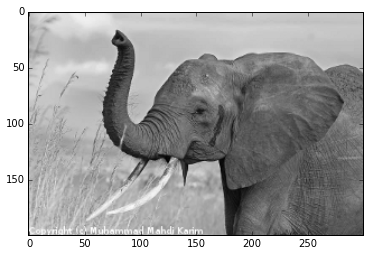

In [238]:
plt.imshow(plt.imread('red_elephant.png')) 

其他包：

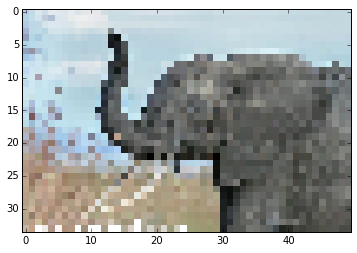

In [239]:
from scipy.misc import imsave
imsave('tiny_elephant.png', img[::6,::6])
plt.imshow(plt.imread('tiny_elephant.png'), interpolation='nearest')

#### 1.3.4.2.3 Numpy的自有格式

Numpy有自有的二进制格式，没有便携性但是I/O高效：

In [240]:
data = np.ones((3, 3))
np.save('pop.npy', data)
data3 = np.load('pop.npy')

#### 1.3.4.2.4 知名的（并且更复杂的）文件格式

* HDF5: [h5py](http://code.google.com/p/h5py/), [PyTables](http://pytables.org/)
* NetCDF: `scipy.io.netcdf_file`, [netcdf4-python](http://code.google.com/p/netcdf4-python/), ...
* Matlab: `scipy.io.loadmat`, `scipy.io.savemat`
* MatrixMarket: `scipy.io.mmread`, `scipy.io.mmread`

... 如果有人使用，那么就可能有一个对应的Python库。

**练习：文本数据文件**

写一个Python脚本从[populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt)加载数据，删除前五行和后五行。将这个小数据集存入 `pop2.txt`。

**Numpy内部**

如果你对Numpy的内部感兴趣, 有一个关于[Advanced Numpy](http://scipy-lectures.github.io/advanced/advanced_numpy/index.html#advanced-numpy)的很好的讨论。

## 1.3.5 一些练习

### 1.3.5.1 数组操作

* 从2D数组（不需要显示的输入）:

```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```

并且生成一个第二和第四行的新数组。 

* 将数组a的每一列以元素的方式除以数组b (提示: `np.newaxis`): 

In [243]:
a = np.arange(25).reshape(5, 5)
b = np.array([1., 5, 10, 15, 20])

* 难一点的题目：创建10 X 3的随机数数组 （在[0, 1]的范围内）。对于每一行，挑出最接近0.5的数。
    * 用 `abs`和 `argsort`找到每一行中最接近的列 `j`。
    * 使用象征索引抽取数字。（提示：a[i,j]-数组 `i` 必须包含 `j` 中成分的对应行数）
    
### 1.3.5.2 图片操作：给Lena加边框

让我们从著名的Lena图（http://www.cs.cmu.edu/~chuck/lennapg/） 上开始，用Numpy数组做一些操作。Scipy在 `scipy.lena`函数中提供了这个图的二维数组：

In [244]:
from scipy import misc
lena = misc.lena()

**注**：在旧版的scipy中，你会在 `scipy.lena()`找到lena。

这是一些通过我们的操作可以获得图片：使用不同的颜色地图，裁剪图片，改变图片的一部分。

![lenas](http://scipy-lectures.github.io/_images/lenas.png)

* 让我们用pylab的 `imshow`函数显示这个图片。

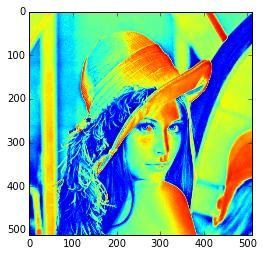

In [245]:
import pylab as plt
lena = misc.lena()
plt.imshow(lena)

* Lena然后以为色彩显示。要将她展示为灰色需要指定一个颜色地图。

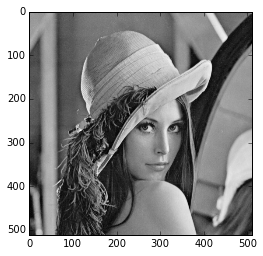

In [246]:
plt.imshow(lena, cmap=plt.cm.gray)

* 用一个更小的图片中心来创建数组：例如，从图像边缘删除30像素。要检查结果，用 `imshow` 显示这个新数组。

In [247]:
crop_lena = lena[30:-30,30:-30]

* 现在我们为Lena的脸加一个黑色项链形边框。要做到这一点，需要创建一个面具对应于需要变成黑色的像素。这个面具由如下条件定义 `(y-256)**2 + (x-256)**2`

In [248]:
y, x = np.ogrid[0:512,0:512] # x 和 y 像素索引
y.shape, x.shape

((512, 1), (1, 512))

In [249]:
centerx, centery = (256, 256) # 图像中心
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2 # 圆形

接下来我们为面具对应的图片像素赋值为0。语句非常简单并且直觉化：

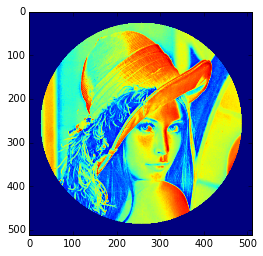

In [253]:
lena[mask] = 0
plt.imshow(lena)

* 接下来：将这个练习的所有命令复制到 `lena_locket.py` 脚本中，并且在IPython中用 `%run lena_locket.py`执行这个脚本，将圆形改为椭圆。

### 1.3.5.3 数据统计

[populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt)中的数据描述了野兔和猞猁（以及胡萝卜）在加拿大北部过去十年的数量：

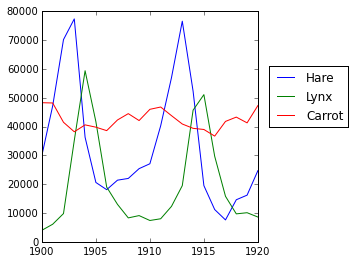

In [254]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T  # 技巧: 列到变量
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

根据[populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt)中的数据计算并打印...

1. 每个物种在这个时间段内的数量平均数及标准差。
2. 每个物种在哪一年数量最多。
3. 每一年哪个物种数量最多。（提示：`np.array(['H', 'L', 'C'])`的`argsort` 和象征索引）
4. 哪一年数量超过50000。（提示：比较和 `np.any`）
5. 每个物种有最少数量的两年。（提示： `argsort`、象征索引）
6. 比较（作图）野兔和猞猁总量的变化（看一下 `help(np.gradient)`）。看一下相关（见 `help(np.corrcoef)`）。

... 所有都不应该使用for循环。

答案：[Python源文件](http://scipy-lectures.github.io/_downloads/2_2_data_statistics.py)

### 1.3.5.4 粗略积分估计

写一个函数  `f(a, b, c)` 返回$a^b - c$。组成一个24x12x6数组其中包含它值在参数范围[0,1] x [0,1] x [0,1]。

接近的3-D积分

![math](http://scipy-lectures.github.io/_images/math/7057c0b4df82c2659d776bcdc0eb1c9e16f61f9f.png)

在这个体积之上有相同的平均数。准确的结果是![result](http://scipy-lectures.github.io/_images/math/13ff2c8691c09121c0bba41558b2ad22e55e077c.png)... - 你的相对误差是多少？

（技巧：使用元素级别的操作和广播。你可以用 `np.ogrid` 获得在 `np.ogrid[0:1:20j]` 范围内的数据点。）

**提醒**Python函数：

In [255]:
def f(a, b, c):
    return some_result

答案：[Python源文件](http://scipy-lectures.github.io/_downloads/2_3_crude_integration.py)

### 1.3.5.5 Mandelbrot集合

![mandelbrot](http://scipy-lectures.github.io/_images/2_4_mandelbrot.png)

写一个脚本计算Mandelbrot分形。Mandelbrot迭代

```python
N_max = 50
some_threshold = 50
c = x + 1j*y
for j in xrange(N_max):
    z = z**2 + c
```

点（x, y）属于Mandelbrot集合，如果|c| < some_threshold。

作如下计算：

* 构建一个网格 c = x + 1j\*y， 值在范围[-2, 1] x [-1.5, 1.5]
* 进行迭代
* 构建2-D布尔面具标识输入集合中的点
* 用下列方法将结果保存到图片：

```python
import matplotlib.pyplot as plt
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5]) 
plt.gray()
plt.savefig('mandelbrot.png')
```

答案：[Python源文件](http://scipy-lectures.github.io/_downloads/2_4_mandelbrot.py)

### 1.3.5.6 马尔科夫链

![markov-chain](http://scipy-lectures.github.io/_images/markov-chain.png)

马尔可夫链过渡矩阵P以及在状态p的概率分布：
1. `0 <= P[i,j] <= 1`：从状态i变化到j的概率
2. 过度规则： $p_{new} = P^T p_{old}$
3. `all(sum(P, axis=1) == 1)`, `p.sum() == 1`: 正态化

写一个脚本产生五种状态，并且：
* 构建一个随机矩阵，正态化每一行，以便它是过度矩阵。
* 从一个随机（正态化）概率分布`p`开始，并且进行50步=> `p_50`
* 计算稳定分布：P.T的特征值为1的特征向量（在数字上最接近1）=> `p_stationary`

记住正态化向量 - 我并没有...
* 检查一下 `p_50` 和 `p_stationary`是否等于公差1e-5

工具箱：`np.random.rand`、 `.dot()`、`np.linalg.eig`、reductions、`abs()`、`argmin`、comparisons、`all`、`np.linalg.norm`等。

答案：[Python源文件](http://scipy-lectures.github.io/_downloads/2_5_markov_chain.py)